<a href="https://colab.research.google.com/github/Madhumita1110/PySpark_ELT_pipeline/blob/main/technicalprojectI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TECHNICAL PROJECT **

"Higher Education Student Performance Evaluation" 

--using Supervised Classification Machine Learning Techniques- Decision Trees, Random Forests and Categorical Naive Bayes.

 (*Madhumita Srivastava,
L00171338* )

In [ ]:
import numpy as np
import pandas as pd
import requests
from sklearn import tree
import matplotlib
from matplotlib import pyplot as plt
import io


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00623/DATA.csv"
df = pd.read_csv(url, sep=";")


In [ ]:
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [ ]:
#renaming column names for visual convenience and better clarity of the data
df.rename(columns = {'1':'Age', 
                      '2':'Gender',
                     '3':'High school Type',
                     '4':'Scholarship',
                     '5':'Additional work',
                     '6':'Regular artistic or sports activity',
                     '7':'Have Partner',
                     '8':'Salary','9':'Transportation to the university',
                     '10':'Accommodation type',
                     '11':'Mothers education',
                     '12':'Father education',
                     '13':'No. of siblings',
                     '14':'Parental status',
                     '15':'Mother occupation',
                     '16':'Father occupation',
                     '17':'Weekly study hours',
                     '18':'Reading Non-scientific books/journals',
                     '19':'Reading Scientific books/journals',
                     '20':'Attendance to the seminars/conferences',
                     '21':'Impact of projects/activities on success',
                     '22':'Attendance to classes',
                     '23':'Preparation to midterm exams with friends/alone/NA',
                     '24':'Preparation to midterm exams regularly, near exam date or never',
                     '25':'Taking notes in classes',
                     '26':'Listening in classes',
                     '27':'Discussion improves interest and success in the course',
                     '28':'Flip classroom',
                     '29':'CGPA in last semester',
                     '30':'Expected CGPA in graduation'
                  }, 
            inplace = True)
df.head()

,STUDENT ID,Age,Gender,High school Type,Scholarship,Additional work,Regular artistic or sports activity,Have Partner,Salary,Transportation to the university,...,Preparation to midterm exams with friends/alone/NA,"Preparation to midterm exams regularly, near exam date or never",Taking notes in classes,Listening in classes,Discussion improves interest and success in the course,Flip classroom,CGPA in last semester,Expected CGPA in graduation,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


**Hypothesis**- 1. What will be the end of term performances of the students?
2. Does personal and family factors affect our prediction?

We will change our classification problem from 8 classifiers to 3 classfiers only since our dataset is not large enough to train 8 classifiers. We will add a new Target class and drop previous.

In [ ]:
#OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)
#define a function to replace 8 classes with 3 classes- poor, average and good

def categorise(row):  
    if row['GRADE'] >= 0 and row['GRADE'] <=2:
        return 'POOR'
    elif row['GRADE'] > 2 and row['GRADE'] <=5:
        return 'AVG'
    else:
        return 'GOOD'
    

In [ ]:
#define a new column which is our Target class

df['TARGET'] = df.apply(lambda row: categorise(row), axis=1)

df.head()

,STUDENT ID,Age,Gender,High school Type,Scholarship,Additional work,Regular artistic or sports activity,Have Partner,Salary,Transportation to the university,...,"Preparation to midterm exams regularly, near exam date or never",Taking notes in classes,Listening in classes,Discussion improves interest and success in the course,Flip classroom,CGPA in last semester,Expected CGPA in graduation,COURSE ID,GRADE,TARGET
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,POOR
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,POOR
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,POOR
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,POOR
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,POOR


In [ ]:
# map POOR, AVG and GOOD to numerical values 0,1,2 for machine to understand. This is called numerical encoding of data.
d = {'POOR': 0, 'AVG': 1, 'GOOD':2} 
df['TARGET'] = df['TARGET'].map(d)
df.head()

,STUDENT ID,Age,Gender,High school Type,Scholarship,Additional work,Regular artistic or sports activity,Have Partner,Salary,Transportation to the university,...,"Preparation to midterm exams regularly, near exam date or never",Taking notes in classes,Listening in classes,Discussion improves interest and success in the course,Flip classroom,CGPA in last semester,Expected CGPA in graduation,COURSE ID,GRADE,TARGET
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0


In [ ]:
##Target column is made with grade column only, so drop grade column. 'Student Id' has null impact on target so drop it also.

df=df.drop(['STUDENT ID','GRADE'], axis=1) 

In [ ]:
# convert datatype of all nominal categorical variables to 'str' type as there is no numerical significance attached to them.

columns = list(df.columns)

#change the first and last column names below as required
start_column = columns.index('Age')
end_column   = columns.index('Flip classroom')

for index, col in enumerate(columns):
    if (start_column <= index) & (index <= end_column):
        df[col] = df[col].astype(str)


In [ ]:
df=df.astype({"COURSE ID":str})  #course id is also nominal, so its datatype also.

In [ ]:
df.dtypes 


Age                                                                object
Gender                                                             object
High school Type                                                   object
Scholarship                                                        object
Additional work                                                    object
Regular artistic or sports activity                                object
Have Partner                                                       object
Salary                                                             object
Transportation to the university                                   object
Accommodation type                                                 object
Mothers education                                                  object
Father education                                                   object
No. of siblings                                                    object
Parental status                       

In [ ]:
# check distribution of target_class column

dist= df['TARGET'].value_counts()
dist

0    67
1    48
2    30
Name: TARGET, dtype: int64

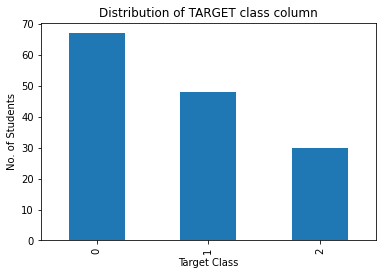

In [ ]:
#Visualise target class distribution among students.

import matplotlib.pyplot as plt

dist.plot(x='TARGET',
        kind='bar',
        stacked= False,
        title='Distribution of TARGET class column',
        xlabel= 'Target Class',
        ylabel= 'No. of Students')

In [ ]:
# view the percentage distribution of target_class column. (class imbalance is there)

pie=np.round(dist*100/(len(df)))
pie

0    46.0
1    33.0
2    21.0
Name: TARGET, dtype: float64

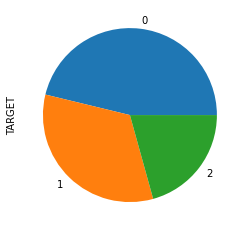

In [ ]:
df['TARGET'].value_counts().plot(kind= "pie")


In [ ]:
#Let us see how our Target class is distributed - Gender-wise
df.groupby('TARGET').Gender.value_counts()


TARGET  Gender
0       1         36
        2         31
1       2         30
        1         18
2       2         26
        1          4
Name: Gender, dtype: int64

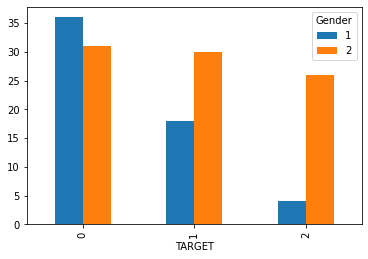

In [ ]:
#We will visualise this information using a stacked bar chart(Female=1 , Male=2)

pd.crosstab(df['TARGET'], df['Gender']).plot(kind='bar', stacked=False)


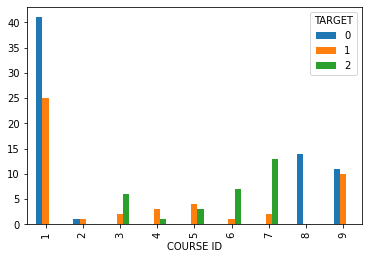

In [ ]:
#Visualise course ID wise performance of students. It creates an impact on target class.
#maximum students are enrolled in course 1, and most of them gave poor or average result. No good results in this course ID.
#course 8 shows poor performance of all the students who took up that course.
#Course 3,6,7 students did well.

pd.crosstab(df['COURSE ID'], df['TARGET']).plot(kind='bar', stacked=False)

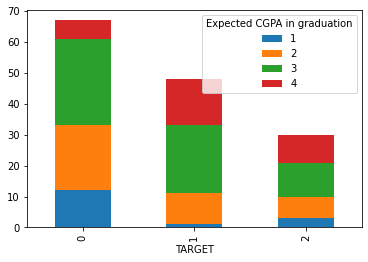

In [ ]:
#Let's visualise student's expected performance vs the actual performance
#Expected CGPA in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
#If suppose we classify expected CGPA in terms of target or actual performance like this:
# 0 (Poor) - 1: less than 2.00 cgpa
# 1 (Avg)- 2: 2.00-2.49, 3: 2.50-2.99
# 2 (Good)- 4: 3.00-3.49, 5: above 3.49

#See that the actual performance is somewhat related to the expected performance but we cant predict it just by visualising on a graph.

pd.crosstab(df['TARGET'], df['Expected CGPA in graduation']).plot(kind='bar', stacked=True)

In [ ]:
#check the correlation among variables

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CGPA in last semester,Expected CGPA in graduation,TARGET
CGPA in last semester,1.000000,0.657853,0.305233
Expected CGPA in graduation,0.657853,1.000000,0.240908
TARGET,0.305233,0.240908,1.000000


There is a strong correlation between attributes 'CGPA in last semester' and 'Expected CGPA in Graduation'. So we'll drop one of them to describe our features

In [ ]:
# Remove the 'Target' and 'CGPA in last semester' columns to describe our features. 
X = df.drop(['TARGET', 'CGPA in last semester'], axis=1)

# Labels
y = df['TARGET']


We will now split our data into train and test set and apply Decison Tree model and Random Forest model for predicting student's performance-0(Poor),1(Avg)or 2(Good)

In [ ]:
#Split the dataset into train and test data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)


In [ ]:
#Apply Decision tree model for prediction.

from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

clf = tree.DecisionTreeClassifier(random_state=0)

clf = clf.fit(X_train,y_train)

# Prediction step
pred_train= clf.predict(X_train)
pred_test = clf.predict(X_test)

# Train-Test accuracy and Test precision
acc_train= sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')

print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')
print(f'F1 score of test data is: {f1score*100: .2f}%')

Accuracy score of train data is:  100.00%
Accuracy score of test data is:  53.33%
F1 score of test data is:  56.65%


We got 100% accuracy for train data but for test data it is not generalising, which clearly means that our model is overfitted. We will avoid it using pre-pruning technique.

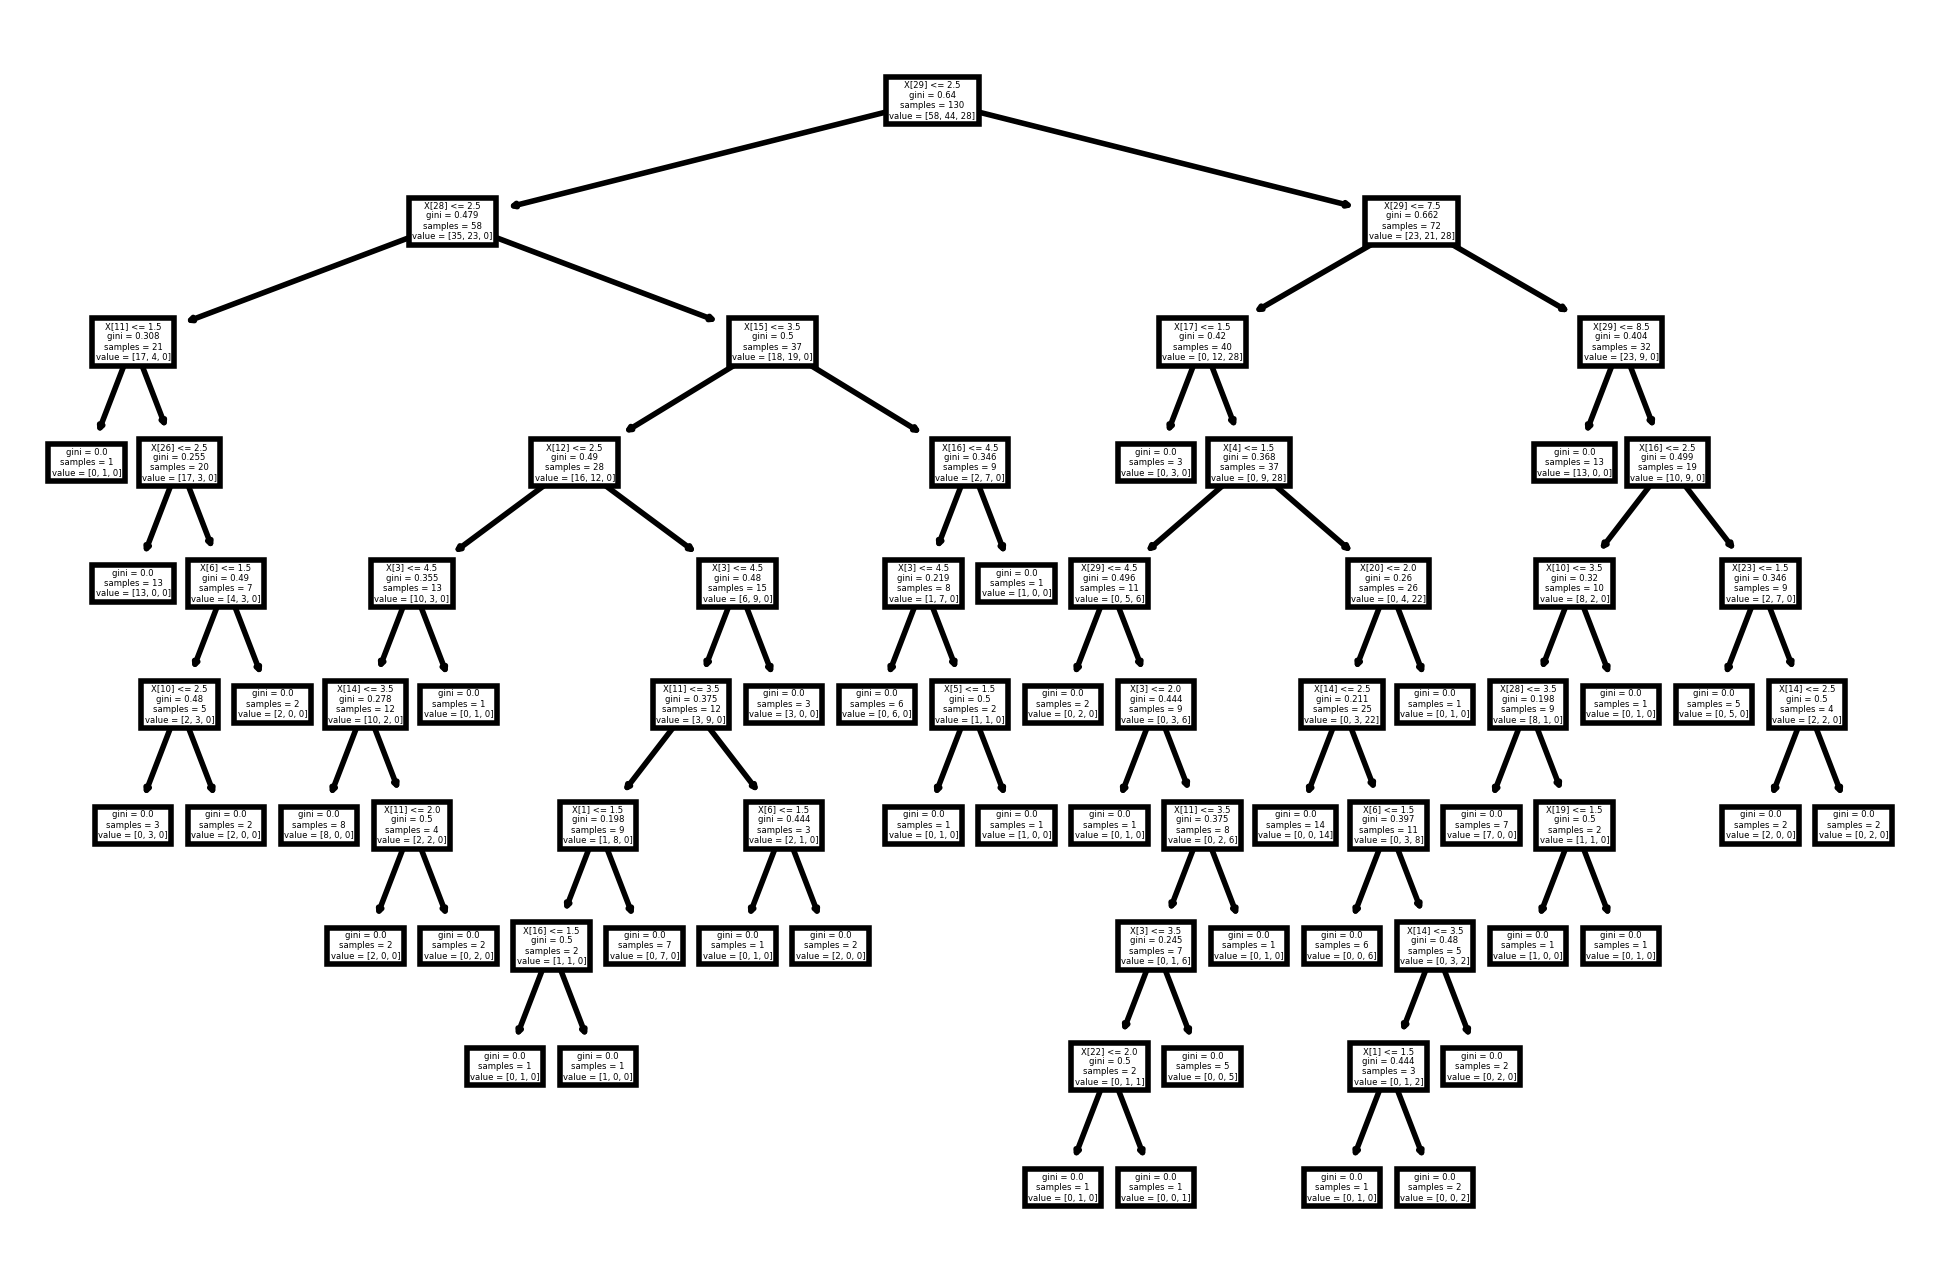

In [ ]:
#look at the decision tree we made. It has so many branches and leaves. We will try to reduce it using pre-pruning technique.

plt.figure(dpi=400)
tree.plot_tree(clf)
plt.show()

In [ ]:
#Pre-pruning in decision tree by setting hyperparameters.

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=7, min_samples_split=2, min_samples_leaf= 2)
clf = clf.fit(X_train,y_train)

# Prediction step
pred_train= clf.predict(X_train)
pred_test = clf.predict(X_test)

# Train-Test accuracy and Test precision
acc_train= sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')

print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')
print(f'F1 score of test data is: {f1score*100: .2f}%')

Accuracy score of train data is:  95.38%
Accuracy score of test data is:  60.00%
F1 score of test data is:  61.11%


We can see that after pruning we got better accuracy with controlled overfitting of data.

We can also avoid overfitting of model by using Random Forests technique which is an ensemble of a number of Decision Trees which works on majority voting.

In [ ]:
#Try to train data with Random Forest classifier. 

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 30, max_depth=3,random_state=0)
clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')
print(f'F1 score of test data is: {f1score*100: .2f}%')


Accuracy score of train data is:  76.15%
Accuracy score of test data is:  73.33%
F1 score of test data is:  66.96%


Let's train our model with Categorical Naive Bayes algorithm and see how it performs!

In [ ]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')
print(f'F1 score of test data is: {f1score*100: .2f}%')


Accuracy score of train data is:  80.00%
Accuracy score of test data is:  66.67%
F1 score of test data is:  61.52%


**Mutual Information Feature Selection Method**

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the mutual_info_classif() function to select the K best parameters. We will use this for feature selection.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

mi = SelectKBest(score_func=mutual_info_classif, k='all')
mi.fit(X_train, y_train)
X_train_mi = mi.transform(X_train)
X_test_mi = mi.transform(X_test)

Attribure 0 : 0.069550
Attribure 1 : 0.055748
Attribure 2 : 0.000000
Attribure 3 : 0.010730
Attribure 4 : 0.074381
Attribure 5 : 0.037540
Attribure 6 : 0.025445
Attribure 7 : 0.000000
Attribure 8 : 0.000000
Attribure 9 : 0.000000
Attribure 10 : 0.000000
Attribure 11 : 0.000000
Attribure 12 : 0.017164
Attribure 13 : 0.000000
Attribure 14 : 0.000000
Attribure 15 : 0.000000
Attribure 16 : 0.025999
Attribure 17 : 0.044783
Attribure 18 : 0.018511
Attribure 19 : 0.032847
Attribure 20 : 0.024421
Attribure 21 : 0.000000
Attribure 22 : 0.000000
Attribure 23 : 0.000000
Attribure 24 : 0.029564
Attribure 25 : 0.000000
Attribure 26 : 0.082185
Attribure 27 : 0.000000
Attribure 28 : 0.000000
Attribure 29 : 0.455133


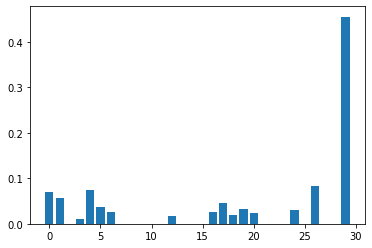

In [ ]:
# let's see the scores of features derived from mutual information method 

for values in range(len(mi.scores_)):
 print('Attribure %d : %f' % (values, mi.scores_[values]) )

# we'll visualise the scores on a bar plot as well 
plt.bar([values for values in range(len(mi.scores_))], mi.scores_)
plt.show()


Now apply Decision Tree to 6 best features provided by mutual information feature selection.

In [ ]:
mi = SelectKBest(score_func=mutual_info_classif, k=6)
mi.fit(X_train, y_train)
X_train_mi = mi.transform(X_train)
X_test_mi = mi.transform(X_test)

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train_mi,y_train)

# Prediction step
pred_train= clf.predict(X_train_mi)
pred_test = clf.predict(X_test_mi)

# Train-Test accuracy and Test precision
acc_train= sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')

print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')
print(f'F1score of test data is: {f1score*100: .2f}%')

Accuracy score of train data is:  89.23%
Accuracy score of test data is:  66.67%
F1score of test data is:  62.96%


Performance of Random Forest on selected features.

In [ ]:
clf = RandomForestClassifier(n_estimators = 30, max_depth=5,random_state=0)
clf.fit(X_train_mi,y_train)
pred_train = clf.predict(X_train_mi)
pred_test = clf.predict(X_test_mi)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')
print(f'F1score of test data: {f1score*100: .2f}%')

Accuracy score of train data is:  81.54%
Accuracy score of test data is:  53.33%
F1score of test data:  51.85%


Performance of CNB.

In [ ]:
clf = CategoricalNB()
clf.fit(X_train_mi,y_train)
pred_train = clf.predict(X_train_mi)
pred_test = clf.predict(X_test_mi)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')
print(f'F1score of test data: {f1score*100: .2f}%')


Accuracy score of train data is:  76.92%
Accuracy score of test data is:  46.67%
F1score of test data:  48.50%


Our accuracy increased with the mutual information gain feature selection method.

**Chi-Squared Feature Selection Method**

Scikit-Learn library provides a feature selection method called chi-squared which helps us selecting k best features. We will choose k best features from chi-squared and try to implement on our model.

In [ ]:
from sklearn.feature_selection import chi2

chi = SelectKBest(score_func=chi2, k='all')
chi.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7ff46dc52310>)

Attribute 0: 1.376592
Attribute 1: 2.001554
Attribute 2: 0.097155
Attribute 3: 0.033742
Attribute 4: 0.377802
Attribute 5: 0.092952
Attribute 6: 0.412226
Attribute 7: 1.783495
Attribute 8: 4.021420
Attribute 9: 0.443802
Attribute 10: 4.536615
Attribute 11: 0.352962
Attribute 12: 2.485044
Attribute 13: 0.335353
Attribute 14: 0.116930
Attribute 15: 0.036831
Attribute 16: 0.086981
Attribute 17: 1.648854
Attribute 18: 0.033865
Attribute 19: 0.925836
Attribute 20: 1.854528
Attribute 21: 0.890562
Attribute 22: 0.268329
Attribute 23: 0.095125
Attribute 24: 0.358342
Attribute 25: 0.533646
Attribute 26: 0.925509
Attribute 27: 0.949883
Attribute 28: 2.952089
Attribute 29: 18.589129


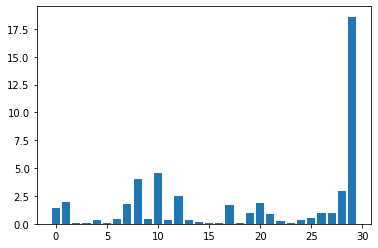

In [ ]:
# let's see the scores for the features by chi-square method

for values in range(len(chi.scores_)):
 print('Attribute %d: %f' % (values, chi.scores_[values]))

# visualise the scores on bar plot
plt.bar([values for values in range(len(chi.scores_))], chi.scores_)
plt.show()

In [ ]:
#apply Decision tree classifier to train 6 best features derived from chi-squared

chi = SelectKBest(score_func=chi2, k=6)
chi.fit(X_train, y_train)
X_train_chi = chi.transform(X_train)
X_test_chi = chi.transform(X_test)

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train_chi,y_train)

# Prediction step
pred_train= clf.predict(X_train_chi)
pred_test = clf.predict(X_test_chi)

# Train-Test accuracy and Test precision
acc_train= sklearn.metrics.accuracy_score(pred_train,y_train)
acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')

print(f'Accuracy score of train data is: {acc_train*100: .2f}%')
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')
print(f'F1score of test data is: {f1score*100: .2f}%')

Accuracy score of train data is:  95.38%
Accuracy score of test data is:  80.00%
F1score of test data is:  80.45%


In [ ]:
#performance with Random forest algorithm.

clf = RandomForestClassifier(n_estimators = 35, max_depth=5,random_state=0)
clf.fit(X_train_chi,y_train)
pred_train = clf.predict(X_train_chi)
pred_test = clf.predict(X_test_chi)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')
print(f'F1score of test data: {f1score*100: .2f}%')

Accuracy score of train data is:  86.15%
Accuracy score of test data is:  80.00%
F1score of test data:  75.24%


In [ ]:
#Performance with Categorical Naive Bayes

clf = CategoricalNB()
clf.fit(X_train_chi,y_train)
pred_train = clf.predict(X_train_chi)
pred_test = clf.predict(X_test_chi)

acc_train = sklearn.metrics.accuracy_score(pred_train,y_train)
print(f'Accuracy score of train data is: {acc_train*100: .2f}%')

acc_test = sklearn.metrics.accuracy_score(pred_test,y_test)
print(f'Accuracy score of test data is: {acc_test*100: .2f}%')

f1score= sklearn.metrics.f1_score(pred_test, y_test, pos_label=1, average='macro')
print(f'F1score of test data: {f1score*100: .2f}%')

Accuracy score of train data is:  80.00%
Accuracy score of test data is:  73.33%
F1score of test data:  62.96%
